<a href="https://colab.research.google.com/github/sunnybhupati/sb-test/blob/master/CNNAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/data/CNNAssignment/CNN_assignment.zip

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Visualize the data


In [14]:
import glob
train_image_names = glob.glob("Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/*.jpg")
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

Total number of training images:  2239


In [15]:
train_image_names


0       Skin cancer ISIC The International Skin Imagin...
1       Skin cancer ISIC The International Skin Imagin...
2       Skin cancer ISIC The International Skin Imagin...
3       Skin cancer ISIC The International Skin Imagin...
4       Skin cancer ISIC The International Skin Imagin...
                              ...                        
2234    Skin cancer ISIC The International Skin Imagin...
2235    Skin cancer ISIC The International Skin Imagin...
2236    Skin cancer ISIC The International Skin Imagin...
2237    Skin cancer ISIC The International Skin Imagin...
2238    Skin cancer ISIC The International Skin Imagin...
Length: 2239, dtype: object

In [16]:
# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# # generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassId
0,ISIC_0029278.jpg,basal cell carcinoma
1,ISIC_0029201.jpg,basal cell carcinoma
2,ISIC_0029515.jpg,basal cell carcinoma
3,ISIC_0029779.jpg,basal cell carcinoma
4,ISIC_0024848.jpg,basal cell carcinoma


In [17]:
unique_train_df = train_df.groupby('ClassId').first()

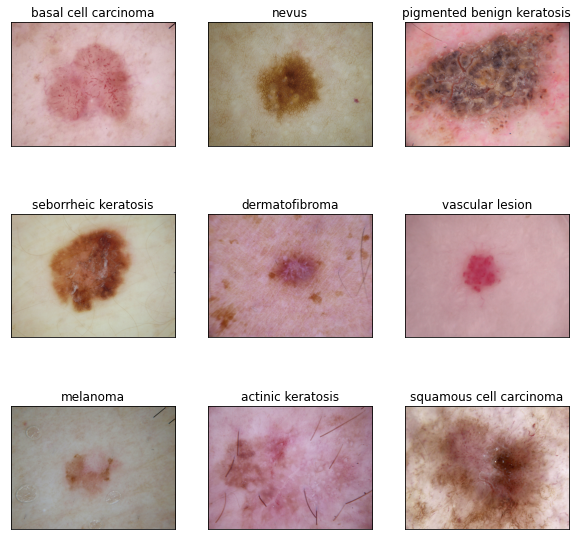

In [18]:
plot_df = unique_train_df.sample(9).reset_index()
plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = plot_df.loc[i, 'ClassId']
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('Skin cancer ISIC The International Skin Imaging Collaboration/Train/',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])